# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
model = LinearRegression()

In [3]:
##### Your Code Here #####


In [4]:
y = df["price"]
x = df["zipcode"]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5, random_state = 42)
X_train = np.array(X_train).reshape(-1,1)
m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict((np.array(X_test).reshape(-1,1)))
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = np.sqrt(mean_squared_error(Y_test, y_test_prediction))
R2 = r2_score(Y_test, y_test_prediction)
MSE,RMSE,R2

(148619782534.57547, 385512.3636598124, 0.0022319275789535187)

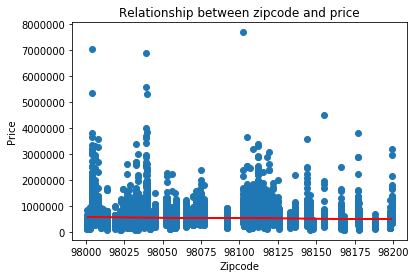

In [5]:
slope = m1.coef_[0]
b = m1.intercept_
line =[ slope*x + b for x in X_test]

plt.scatter(X_test, Y_test)
plt.plot(X_test,line, color = 'r')
plt.ylabel("Price")
plt.xlabel("Zipcode")
plt.title("Relationship between zipcode and price")
plt.show()

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [6]:
##### Your Code Here #####
y = df["price"]
x = df[["bedrooms","sqft_lot"]]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = np.sqrt(mean_squared_error(Y_test, y_test_prediction))
R2 = r2_score(Y_test, y_test_prediction)
MSE,RMSE,R2

(121073202628.78223, 347955.74808987166, 0.09651091793541178)

In [7]:
X_train

,bedrooms,sqft_lot
6350,3,6696
7176,4,7102
8067,2,4000
1564,3,5750
9823,4,6000
17892,3,6860
3470,3,3750
16588,4,5658
2289,3,9689
3789,4,15398


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [8]:
##### Your Code Here #####
y = df["price"]
x = df.drop(["price","id","date"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = MSE**0.5
R2 = r2_score(Y_test, y_test_prediction)
MSE, RMSE, R2

(42018773894.24417, 204984.81381371687, 0.6964353645777237)

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)


In [9]:
df_zip = pd.get_dummies(df['zipcode'])

In [10]:
df1 = pd.concat([df,df_zip],axis=1 )

In [11]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
y = df1["price"]
df1 = pd.concat([df,df_zip],axis=1 )
x = df1.drop(["zipcode","price","id","date"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = MSE**0.5
R2 = r2_score(Y_test, y_test_prediction)
MSE, RMSE, R2

(26896234713.600914, 164000.7155886855, 0.8009409741511891)

In [129]:
y = df1["price"]
df1 = pd.concat([df,df_zip],axis=1 )
x = df1.drop(["zipcode","price","id","date","lat","long"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = MSE**0.5
R2 = r2_score(Y_test, y_test_prediction)
MSE, RMSE, R2

(28455732809.602264, 168688.27110858142, 0.7993424875964342)

In [130]:

df1 = pd.concat([df,df_zip],axis=1 )
x = df1.drop(["zipcode","price","id","date","lat","long"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = MSE**0.5
R2 = r2_score(Y_test, y_test_prediction)
MSE, RMSE, R2

(28538140176.60549, 168932.35384793967, 0.8050027229528105)

In [134]:

df1 = pd.concat([df,df_zip],axis=1 )
x = df1.drop(["zipcode","price","id","date","lat","long","yr_built"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = MSE**0.5
R2 = r2_score(Y_test, y_test_prediction)
MSE, RMSE, R2

(27696123681.313374, 166421.52409262865, 0.7995234824389059)

In [135]:
df1 = pd.concat([df,df_zip],axis=1 )
df1["has_basement"] = df1["sqft_basement"].apply(lambda x: 1 if x >0 else 0)
x = df1.drop(["zipcode","price","id","date","lat","long","yr_built","sqft_basement"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = MSE**0.5
R2 = r2_score(Y_test, y_test_prediction)
MSE, RMSE, R2

(30452119801.23884, 174505.35751442946, 0.7942646191614494)

In [43]:
#df1["has_basement"] = df1["sqft_basement"].apply(lambda x: 1 if x >0 else 0)

In [140]:
df1 = pd.concat([df,df_zip],axis=1 )

x = df.drop(["zipcode","price","id","date","lat","long","yr_built","sqft_basement"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = MSE**0.5
R2 = r2_score(Y_test, y_test_prediction)
MSE, RMSE, R2

(55839963095.99724, 236304.80971829, 0.6166648376392417)

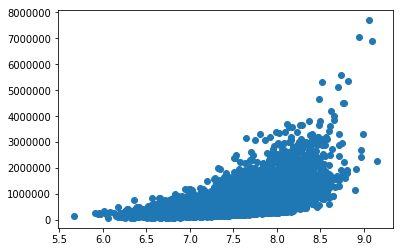

In [113]:
plt.scatter(df1["sqft_above"].apply(np.log),y)

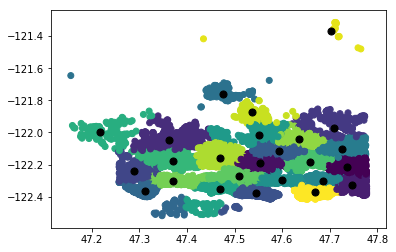

In [146]:
from sklearn.cluster import KMeans
df_cluster = df[["lat","long"]]

kmeans = KMeans(n_clusters=25)
kmeans.fit(df_cluster)
labels = kmeans.labels_

clusters = kmeans.cluster_centers_
plt.scatter(df_cluster["lat"],df_cluster["long"], c = labels, cmap = 'viridis')
plt.scatter(clusters.T[0],clusters.T[1], color = 'black', s=50)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,0
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,18
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,6
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,20
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,20
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,8
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,19
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,14
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,3


In [158]:
df_labels = pd.DataFrame(labels).
df_labels = pd.get_dummies(pd.DataFrame(labels))
df1 =pd.concat([df,df_labels],axis =1)

x = df1.drop(["zipcode","price","id","date","lat","long","yr_built","sqft_basement"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

m1 = model.fit(X_train, Y_train)

y_test_prediction = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_prediction)
RMSE = MSE**0.5
R2 = r2_score(Y_test, y_test_prediction)
MSE, RMSE, R2
df_labels

,0
0,18
1,2
2,0
3,6
4,20
5,20
6,8
7,19
8,14
9,3


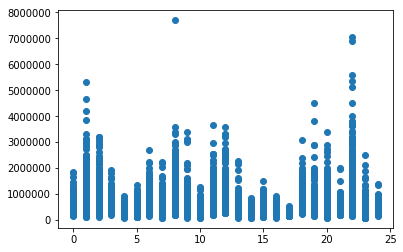

In [144]:
plt.scatter(labels,y)